# Importing libraries

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
from wordcloud import WordCloud,STOPWORDS

# Reading the translated srt subtitle file

In [13]:
df = pd.read_csv('a.txt', sep='/n')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [110]:
df.head()

,1
0,"00:02:35,542 --> 00:02:48,584"
1,[INDISTINCT CHATTERING OF PLAYERS]
2,2
3,"00:03:06,209 --> 00:03:08,250"
4,[PLAYERS CHEERING]


# Removing timestamps and Noise description

In [15]:
df_n=df[~df['1'].str.contains(r'[0-9]')]
df_c=df_n[~df_n['1'].str.startswith('[')]

,1
3309,"02:11:46,709 --> 02:11:50,334"
3310,"Saji: Bony says, just to remind you of the me..."
3311,1105
3312,"02:11:53,709 --> 02:12:21,375"
3313,[THEME MUSIC]


In [109]:
df_c.shape

(977, 1)

There are a total of 977 dialogues from all the charecters in the movie

In [39]:
977/135

7.237037037037037

There is an average of 8 dialogues per minute in the movie.
We can observe that the dialogues per minute is less, which implies that the director has given more consideration to the backgroud score, cinematography and expressions of the actors for a better expressive movie.

# Wordcloud for the most common occuring words in the dialogues

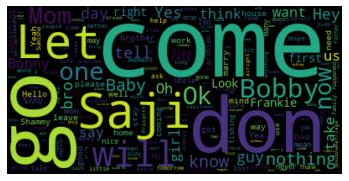

In [66]:
import nltk
#from nltk.corpus import stopwords
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])
textt = " ".join(review for review in df_c['1'])
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

Saji and Bobby has most of the dialogues in the movie, which implies they might have the highest screen time in the movie.


# Sentiment Analysis with AFINN Lexicon

In [68]:
pip install afinn
from afinn import Afinn
af = Afinn()

     |████████████████████████████████| 61kB 3.7MB/s 
  Created wheel for afinn: filename=afinn-0.1-cp36-none-any.whl size=53453 sha256=6870a47b50fd2c36299386b3ce799cb77de5c00a7f2d3281aaf20de945886e75
  Stored in directory: /root/.cache/pip/wheels/b5/1c/de/428301f3333ca509dcf20ff358690eb23a1388fbcbbde008b2
Successfully built afinn


## Computing sentiment score and categorizing the category for each dialogue

In [74]:
sentiment_scores = [af.score(i) for i in df_c['1']]
sentiment_category = ['positive' if score > 0 
                          else 'negative' if score < 0 
                              else 'neutral' 
                                  for score in sentiment_scores]
df_c=df_c.reset_index().drop('index',axis=1)
df_s = pd.concat([df_c,pd.DataFrame(sentiment_category)],axis=1)

## DataFrame with dialogue and the sentiment category for each dialogue

In [111]:
df_s

,1,0
0,What’s your plan for the vacation?,neutral
1,"Nothing, what about you?",neutral
2,Let’s plan something.,neutral
3,"Nizam, how are you going home?",neutral
4,Mom and Dad will pick me up.,neutral
...,...,...
972,"Come, catch us if you are a man.",neutral
973,Are you scared now?,negative
974,No.,negative
975,But I am scared!,negative


In [102]:
# split df - positive and negative sentiment:
positive = df_s[df_s[0] == 'positive']
negative = df_s[df_s[0] == 'negative']

## Word Cloud of dialogues with positive sentiment


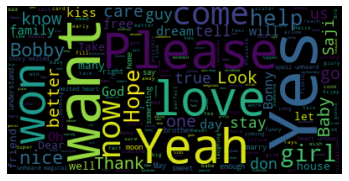

In [106]:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href","good","great"]) 
## good and great removed because they were included in negative sentiment
pos = " ".join(review for review in positive['1'])
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

## Word cloud of dialogues with negative sentiment

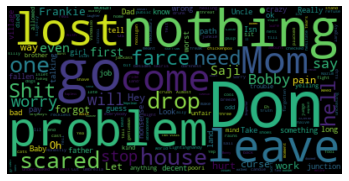

In [107]:
neg = " ".join(review for review in negative['1'])
wordcloud3 = WordCloud(stopwords=stopwords).generate(neg)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud33.png')
plt.show()